In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
from ipywidgets import *
import seaborn as sns
import autolens as al
sns.set_theme()
sns.set(font_scale=1.3)

%matplotlib inline

In [2]:
test_dataset = pd.read_csv('./test_dataset.csv')
test_dataset.head()

,Unnamed: 0,index,OBJID-g,H0-g,Om0-g,exposure_time-g,numPix-g,pixel_scale-g,psf_type-g,read_noise-g,...,PLANE_1-REDSHIFT-g,PLANE_2-REDSHIFT-g,PLANE_1-REDSHIFT-r,PLANE_2-REDSHIFT-r,PLANE_1-REDSHIFT-i,PLANE_2-REDSHIFT-i,PLANE_1-REDSHIFT-z,PLANE_2-REDSHIFT-z,PLANE_1-REDSHIFT-Y,PLANE_2-REDSHIFT-Y
0,0,1501,1502,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,...,0.935053,3.726231,0.935053,3.726231,0.935053,3.726231,0.935053,3.726231,0.935053,3.726231
1,1,705,706,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,...,0.339738,4.820473,0.339738,4.820473,0.339738,4.820473,0.339738,4.820473,0.339738,4.820473
2,2,106,107,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,...,0.858379,2.855011,0.858379,2.855011,0.858379,2.855011,0.858379,2.855011,0.858379,2.855011
3,3,2464,2465,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,...,0.726914,4.242360,0.726914,4.242360,0.726914,4.242360,0.726914,4.242360,0.726914,4.242360
4,4,915,916,73.0,0.3,90.0,100,0.263,GAUSSIAN,7,...,0.375647,1.763864,0.375647,1.763864,0.375647,1.763864,0.375647,1.763864,0.375647,1.763864


In [3]:
imfit_lens_light_ell = pd.read_csv('./fits_results/lens_light_ellsersic/lens_light_report_imfit.csv',
                                   names=['OBJID', 'x0', 'y0', 'PA', 'ell', 'n', 'I_e', 'r_e', 'radius', 'chiquad_dof'])
imfit_lens_light_sph = pd.read_csv('./fits_results/lens_light_sphsersic/lens_light_report_imfit.csv',
                                   names=['OBJID', 'x0', 'y0', 'PA', 'ell', 'n', 'I_e', 'r_e', 'radius', 'chiquad_dof'])

In [4]:
imfit_lens_light_ell.head()

,OBJID,x0,y0,PA,ell,n,I_e,r_e,radius,chiquad_dof
0,1502,50.700114,50.612260,1.421085e-14,7.122148e-12,0.706912,11.863624,5.051974,1.117891,0.279458
1,706,49.999977,50.001324,1.800000e+02,1.051931e-12,1.962626,25.621936,5.823418,0.940359,1005.003072
2,107,50.146377,50.007997,2.842171e-14,3.201462e-01,0.704460,3.699820,7.703340,1.089147,0.031372
3,2465,49.693212,49.834651,1.768313e+02,1.000000e+00,1.656719,-90.766431,1.000000,0.780539,140.051967
4,916,51.002600,47.000000,8.832805e+01,0.000000e+00,2.135612,0.049316,85.000000,1.296153,0.010115


In [15]:
def update_graph(i):
    fig, ax = plt.subplots(6, 3, figsize=(6, 12))
    name = str(test_dataset['OBJID-g'][i])

    print('Object ID:',name)
    norm = 1
    get_sph = utils.getlenslight(pre_path='./fits_results/lens_light_sphsersic/', cutout_name=name)
    fits_matrix_sph_autolens = np.log10(get_sph.read_cutout(model='SPHSERSIC', method='AutoLens')+norm)
    fits_matrix_sph_imfit = np.log10(get_sph.read_cutout(model='SPHSERSIC', method='ImFit')+norm)
    
    get_ell = utils.getlenslight(pre_path='./fits_results/lens_light_ellsersic/', cutout_name=name)
    fits_matrix_ell_autolens = np.log10(get_ell.read_cutout(model='ELLSERSIC', method='AutoLens')+norm)
    fits_matrix_ell_imfit = np.log10(get_ell.read_cutout(model='ELLSERSIC', method='ImFit')+norm)
    
    get_sph_nomask = utils.getlenslight(pre_path='./fits_results/lens_light_sphsersic_nomask/', cutout_name=name)
    fits_matrix_sph_autolens_nomask = np.log10(get_sph_nomask.read_cutout(model='SPHSERSIC_nomask', method='AutoLens')+norm)
    fits_matrix_sph_imfit_nomask = np.log10(get_sph_nomask.read_cutout(model='SPHSERSIC_nomask', method='ImFit')+norm)
    
    
    modelized_lens_light = [fits_matrix_sph_autolens, fits_matrix_sph_imfit, fits_matrix_ell_autolens, fits_matrix_ell_imfit, fits_matrix_sph_autolens_nomask, fits_matrix_sph_imfit_nomask]
    model_names = ['SPH AutoLens', 'SPH ImFit', 'ELL AutoLens', 'ELL ImFit', 'SPH (nomask) AutoLens', 'SPH (nomask) ImFit']
    
    
    original_cutout = np.log10(get_sph.get_original_cutout()+norm)
    #print(original_cutout)
    for j in range(0, len(modelized_lens_light)):

        ax[j][0].imshow(original_cutout)
        if j < 4:
            circle = plt.Circle((50., 50.), float(imfit_lens_light_ell['radius'][i]/0.263), color='w', fill=False, lw=2)
            ax[j][0].add_patch(circle)
        ax[j][1].imshow(modelized_lens_light[j])
        ax[j][2].imshow(original_cutout-modelized_lens_light[j])
        ax[j][0].set_xticks([])
        ax[j][0].set_yticks([])
        ax[j][1].set_xticks([])
        ax[j][1].set_yticks([])
        ax[j][2].set_xticks([])
        ax[j][2].set_yticks([])
        ax[j][2].text(120, 50, str(model_names[j]), fontsize=14, c='k')
        
i = widgets.IntSlider(min=0, max=49, step=1, value=0)
widgets.interactive(update_graph, i=i)

interactive(children=(IntSlider(value=0, description='i', max=49), Output()), _dom_classes=('widget-interact',…

In [6]:
imfit_lens_light_sph.head()

,OBJID,x0,y0,PA,ell,n,I_e,r_e,radius,chiquad_dof
0,1502,50.700119,50.612265,2.842171e-14,0.0,0.706926,11.863360,5.052073,1.117891,0.273383
1,706,50.505284,50.476584,2.842171e-14,0.0,0.606714,19.999615,3.749534,0.940359,0.644395
2,107,50.101083,50.127781,1.441673e-11,0.0,0.698040,3.737727,6.109515,1.089147,0.080072
3,2465,50.519909,50.497432,1.800000e+02,0.0,0.629964,19.428606,3.570199,0.780539,0.503341
4,916,51.002602,47.000000,8.896285e+01,0.0,2.135610,0.049316,85.000000,1.296153,0.009971


In [7]:
free_parameters = 8
autolens_ell = []
autolens_sph = []
for i in range(0, len(imfit_lens_light_sph)):
    mask = al.Mask2D.circular(shape_native=(100, 100), pixel_scales=0.263, radius=float(imfit_lens_light_sph['radius'][i])).flatten()
    n_iter=len(mask)-np.sum(mask)

    get_ell = utils.getpickle(pre_path='./output/LensLight_ELLSERSIC/'+str(imfit_lens_light_sph['OBJID'][i]), cutout_name='samples.pickle')
    pickle_ell = get_ell.read_pickle()
    
    
    get_sph = utils.getpickle(pre_path='./output/LensLight_SPHSERSIC/'+str(imfit_lens_light_sph['OBJID'][i]), cutout_name='samples.pickle')
    pickle_sph = get_sph.read_pickle()
    
    autolens_ell.append(np.abs(pickle_ell.max_log_likelihood_sample.log_likelihood)/(n_iter-free_parameters))
    autolens_sph.append(np.abs(pickle_sph.max_log_likelihood_sample.log_likelihood)/(n_iter-free_parameters))
    
autolens_results = pd.DataFrame(np.array([autolens_ell, autolens_sph]).T, columns=['chi_quad_dof_ell', 'chi_quad_dof_sph'])
autolens_results.head()

,chi_quad_dof_ell,chi_quad_dof_sph
0,1.474323,4.420909
1,1.021791,9.473358
2,0.441500,1.718548
3,1.288141,7.606662
4,0.251208,0.193415


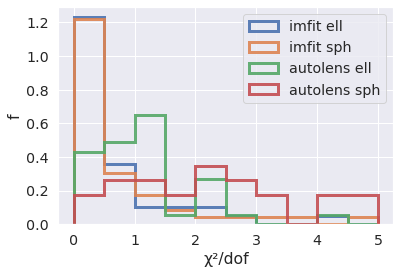

In [8]:
plt.hist(imfit_lens_light_ell['chiquad_dof'], range=(0, 5.), histtype='step', alpha=0.9, label='imfit ell', lw=3., density=True)
plt.hist(imfit_lens_light_sph['chiquad_dof'], range=(0, 5.), histtype='step', alpha=0.9, label='imfit sph', lw=3., density=True)
plt.hist(autolens_results['chi_quad_dof_ell'], range=(0, 5.), histtype='step', alpha=0.9, label='autolens ell', lw=3., density=True)
plt.hist(autolens_results['chi_quad_dof_sph'], range=(0, 5.), histtype='step', alpha=0.9, label='autolens sph', lw=3., density=True)

plt.xlabel('χ²/dof')
plt.ylabel('f')
plt.legend();